In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [19]:
df = pd.read_csv('E:\\1234.csv', 
                 usecols=['name', 'group', 'year', 'value'])

In [20]:
df.head()

,name,group,year,value
0,Vadodara,India,2010,1798000
1,Vadodara,India,2011,1834000
2,Vadodara,India,2012,1871000
3,Vadodara,India,2013,1909000
4,Vadodara,India,2014,1948000


In [21]:
current_year = 2020
dff = (df[df['year'].eq(current_year)]
       .sort_values(by='value', ascending=True)
       .head(10))
dff

,name,group,year,value
10,Vadodara,India,2020,2190000
32,Surat,India,2020,7185000
21,Ahemdabad,India,2020,8059000


<BarContainer object of 3 artists>

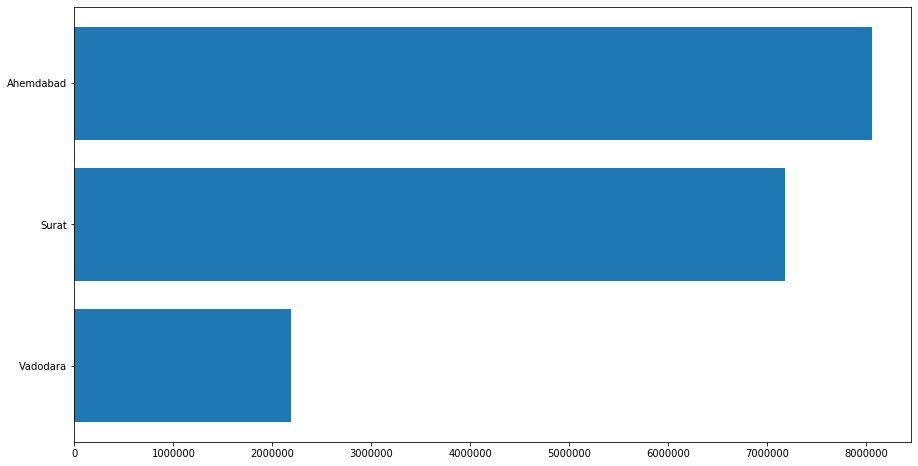

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

Text(1, 0.4, '2020')

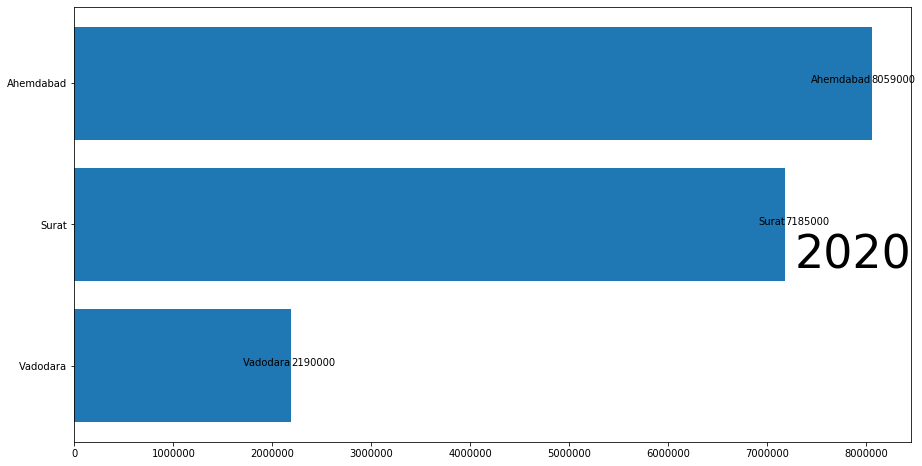

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['name'], dff['value'])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  
    ax.text(value, i,     value,           ha='left')   
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

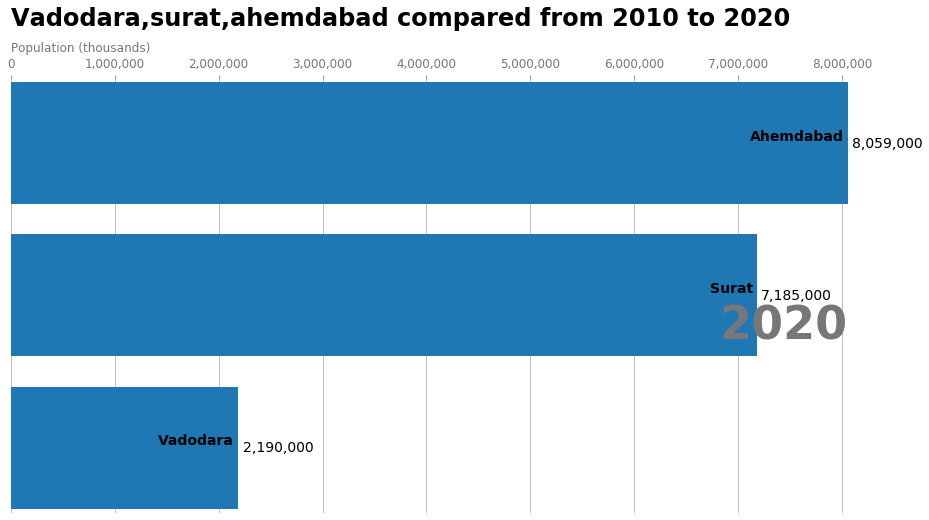

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'])
    dx = int(dff['value'].max() / 200)
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
   
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Vadodara,surat,ahemdabad compared from 2010 to 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    
draw_barchart(2020)

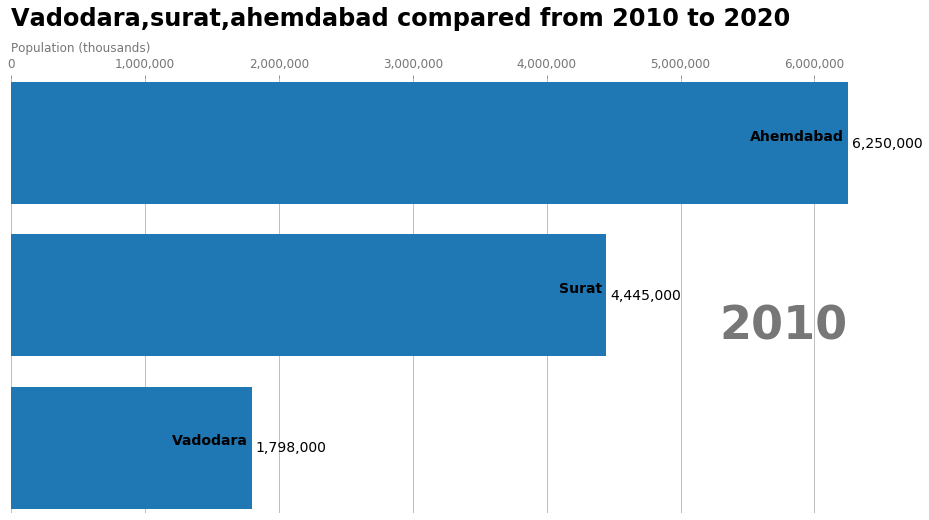

In [27]:

import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2010, 2021))
HTML(animator.to_jshtml()) 